<a href="https://colab.research.google.com/github/Ceikros/Rvcmodelgenshin/blob/main/RVC_Genshin_Impact.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center">

# RVC Genshin Impact
</div>

----
Google has recently taken actions to restrict the usage of the RVC code, I'm not sure how long this RVC will last.<br/>It appears that instead of directly blocking the code, they are limiting access to various resources.

----
##### Changelog 2023.11.8
- Fix CLI Infer due to missing genshin data

# Pick your choice to use the infer (CLI Infer or New Infer)

# CLI Infer (Recommended)

### How to Use?

1. Click the cell number 1 & 2.
2. Use youtube link as audio input or Upload song on Infer\SONG_INPUT using Google Colab Files Explorer then input name file of the file that you've uploaded to that folder.
3. Click the cell number 3.
4. Wait until its done,
5. Done.

In [ ]:
#@title 1. Clone Repository & Install Requirement

!git clone https://github.com/ArkanDash/Infer.git
!apt-get install -qq -y aria2
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M "https://raw.githubusercontent.com/ArkanDash/rvc-genshin-model/master/genshin_model.json" -d "/content/rvc-genshin-model"
%cd Infer
!pip install -q -r requirements.txt
!sudo apt update
!sudo apt install sox

Cloning into 'Infer'...
remote: Enumerating objects: 342, done.
remote: Counting objects: 100% (212/212), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 342 (delta 193), reused 170 (delta 170), pack-reused 130
Receiving objects: 100% (342/342), 1.81 MiB | 26.41 MiB/s, done.
Resolving deltas: 100% (214/214), done.

Download Results:
gid   |stat|avg speed  |path/URI
======+====+===========+=======================================================
b14f42|OK  |   1.7MiB/s|/content/rvc-genshin-model/genshin_model.json

Status Legend:
(OK):download completed.
/content/rvc-inference-new/Infer
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 1.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.0/252.0 kB 17.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Get

In [ ]:
#@title 2. Download MDXNet Vocal Separation and Hubert Base Models
!python src/download_models.py

All models downloaded!


In [ ]:
# @title 3. Generate (For output look below)

# @markdown You can use youtube link or upload your audio file on Infer/SONG_INPUT<br />
# @markdown Example: audio.wav, https://www.youtube.com/watch?v=4wwi-wdpeck
SONG_INPUT = "https://www.youtube.com/watch?v=76sNmqMzUuI" # @param {type:"string"}
CHARACTER = "ayato-jp" # @param ["ayaka-jp","ayato-jp","diluc-jp","eula-jp","fischl-jp","ganyu-jp","hutao-jp","kaeya-jp","keqing-jp","klee-jp","kokomi-jp","mona-jp","nahida-jp","nilou-jp","wanderer-jp","yaemiko-jp","yelan-jp","yoimiya-jp","zhongli-jp","aether-jp-v2","albedo-jp-v2","alhaitam-jp-v2","amber-jp-v2","ayaka-jp-v2","bennett-jp-v2","charlotte-jp-v2","chongyun-jp-v2","cyno-jp-v2","dehya-jp-v2","diona-jp-v2","faruzan-jp-v2","furina-jp-v2","greaterLordRukkhadevata-jp-v2","itto-jp-v2","kaveh-jp-v2","kazuha-jp-v2","kuki-jp-v2","lisa-jp-v2","lumine-jp-v2","lyney-jp-v2","nahida-jp-v2","navia-jp-v2","nilou-jp-v2","ningguang-jp-v2","noelle-jp-v2","paimon-jp-v2","qiqi-jp-v2","raiden-jp-v2","razor-jp-v2","sara-jp-v2","shenhe-jp-v2","signora-jp-v2","venti-jp-v2","xiao-jp-v2","yanfei-jp-v2","zhongli-jp-v2"]

# @markdown Audio Editor Options
PITCH_CHANGE = 0 # @param {type:"integer"}
PITCH_CHANGE_ALL = 0 # @param {type:"integer"}
# @markdown Voice Conversion Options
INDEX_RATE = 0.6 # @param {type:"number"}
FILTER_RADIUS = 3 # @param {type:"integer"}
PITCH_DETECTION_ALGO = "crepe" # @param ["pm", "harvest", "rmvpe", "crepe", "mangio-crepe"]
CREPE_HOP_LENGTH = 128 # @param {type:"integer"}
PROTECT = 0.5 # @param {type:"number"}
REMIX_MIX_RATE = 0.25  # @param {type:"number"}
# @markdown Audio Mixing Options
MAIN_VOL = 0 # @param {type:"integer"}
BACKUP_VOL = 0 # @param {type:"integer"}
INST_VOL = 0 # @param {type:"integer"}
# @markdown Reverb Control
REVERB_SIZE = 0.15 # @param {type:"number"}
REVERB_WETNESS = 0.2 # @param {type:"number"}
REVERB_DRYNESS = 0.8 # @param {type:"number"}
REVERB_DAMPING = 0.7 # @param {type:"number"}
# @markdown Output Format
OUTPUT_FORMAT = "wav" # @param ["mp3", "wav"]

import subprocess
import json
import os
import zipfile
import glob
import shutil

def extract_zip(zip_file, target_folder):
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(target_folder)

def move_folder_contents(src, dest):
    src_contents = os.listdir(src)
    for item in src_contents:
        src_item = os.path.join(src, item)
        dest_item = os.path.join(dest, item)
        if os.path.isdir(src_item):
            shutil.move(src_item, dest_item)
        else:
            shutil.move(src_item, dest)

with open('/content/rvc-genshin-model/genshin_model.json', 'r') as file:
    data = json.load(file)

if not os.path.exists(f"rvc_models/{CHARACTER}"):
  models = data["model_data"]
  for item in models:
    if CHARACTER == item[1]:
      subprocess.run(['mkdir', f'rvc_models/{item[1]}'])
      folder_path = f'rvc_models/{item[1]}'
      subprocess.run(['wget', '-P', folder_path, item[2]])
      zip_files = glob.glob(os.path.join(folder_path, "*.zip"))
      if len(zip_files) == 1:
        zip_file = zip_files[0]
        extract_zip(zip_file, folder_path)
        os.remove(zip_file)
        subfolders = [f for f in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, f))]
        if len(subfolders) == 1:
          subfolder = subfolders[0]
          move_folder_contents(os.path.join(folder_path, subfolder), folder_path)
          os.rmdir(os.path.join(folder_path, subfolder))
        else:
          print("Error: Multiple zip files found.")
else:
    print(f"The model for {CHARACTER} already exists in rvc_models.")

command = [
    "python",
    "src/main.py",
    "-i", SONG_INPUT,
    "-dir", CHARACTER,
    "-p", str(PITCH_CHANGE),
    "-k",
    "-ir", str(INDEX_RATE),
    "-fr", str(FILTER_RADIUS),
    "-rms", str(REMIX_MIX_RATE),
    "-palgo", PITCH_DETECTION_ALGO,
    "-hop", str(CREPE_HOP_LENGTH),
    "-pro", str(PROTECT),
    "-mv", str(MAIN_VOL),
    "-bv", str(BACKUP_VOL),
    "-iv", str(INST_VOL),
    "-pall", str(PITCH_CHANGE_ALL),
    "-rsize", str(REVERB_SIZE),
    "-rwet", str(REVERB_WETNESS),
    "-rdry", str(REVERB_DRYNESS),
    "-rdamp", str(REVERB_DAMPING),
    "-oformat", OUTPUT_FORMAT
]

# Open a subprocess and capture its output
process = subprocess.Popen(command, stdout=subprocess.PIPE, stderr=subprocess.STDOUT, universal_newlines=True)

# Print the output in real-time
for line in process.stdout:
    print(line, end='')

# Wait for the process to finish
process.wait()

Example of generated audio path <br />
Output generated inside "Infer\song_output\random_number"

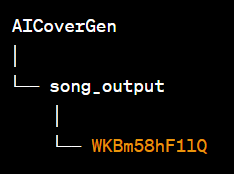

### Repository by [SociallyIneptWeeb](https://github.com/SociallyIneptWeeb/AICoverGen), Colab code by [ardha27](https://github.com/ardha27/AICoverGen-NoUI-Colab), Edited by ArkanDash

# New Infer (Unstable / Beta)

### How to Use?

1. Run the first and second cell.
2. Wait until it's done, then run the third cell.
3. After that you get a two link, click the public link.
4. Use it.

In [ ]:
#@title 1. Clone Repository & Install Dependencies
!python -m pip install -U pip wheel
!apt-get update
!apt-get install -qq -y aria2
!git clone -b master https://github.com/ArkanDash/rvc-inference-new
!pip install -r /content/rvc-inference-new/requirements.txt

DEPRECATION: omegaconf 2.0.6 has a non-standard dependency specifier PyYAML>=5.1.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of omegaconf or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/p

In [ ]:
#@title 2. Download Hubert Base, RVMPE, and Genshin AI Data
!wget https://cdn.discordapp.com/attachments/1143928191585628230/1168925510802341959/model-dl.py
!python model-dl.py

--2023-12-02 17:36:35--  https://cdn.discordapp.com/attachments/1143928191585628230/1168925510802341959/model-dl.py
Resolving cdn.discordapp.com (cdn.discordapp.com)... 162.159.135.233, 162.159.133.233, 162.159.130.233, ...
Connecting to cdn.discordapp.com (cdn.discordapp.com)|162.159.135.233|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 691 [text/x-python]
Saving to: ‘model-dl.py’

model-dl.py         100%[===================>]     691  --.-KB/s    in 0s      

2023-12-02 17:36:36 (443 MB/s) - ‘model-dl.py’ saved [691/691]


Download Results:
gid   |stat|avg speed  |path/URI
======+====+===========+=======================================================
ca8970|OK  |       0B/s|/content/rvc-inference-new/assets/hubert/hubert_base.pt

Status Legend:
(OK):download completed.

Download Results:
gid   |stat|avg speed  |path/URI
======+====+===========+=======================================================
e2a300|OK  |       0B/s|/content/rvc-inference-new/rmvpe

In [ ]:
#@title 3. Run as Gradio
%cd /content/rvc-inference-new/
!python inference.py --colab

/content/rvc-inference-new
Traceback (most recent call last):
  File "/content/rvc-inference-new/inference.py", line 5, in <module>
    from infer.modules.vc.modules import VC
  File "/content/rvc-inference-new/infer/modules/vc/modules.py", line 12, in <module>
    from infer.lib.audio import load_audio, wav2
  File "/content/rvc-inference-new/infer/lib/audio.py", line 6, in <module>
    import av
ModuleNotFoundError: No module named 'av'
